# Task 2

В файле `sex_bmi_smokers.csv` приведены данные (пол, ИМТ, курит/не курит) о более 1000 испытуемых. Сравните количество курящих мужчин и некурящих женщин. Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и выборочную квантиль порядка 3/5 ИМТ всех наблюдателей и отдельно для каждой возможной комбинации пол-курение. Построить график эмпирической функции распределения, гистограмму и box-plot ИМТ для всех наблюдателей и отдельно для каждой возможной комбинации пол-курение.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv("sex_bmi_smokers.csv") 

### Count of male smokers vs. count of female non-smokers

In [29]:
print("Male participants:", len(df[df["sex"] == "male"]))
print("Female participants:", len(df[df["sex"] == "female"]))
print()
print("Male smokers:", len(df[(df["sex"] == "male") & (df["smoker"] == "yes")]))
print("Female non-smokers:", len(df[(df["sex"] == "female") & (df["smoker"] == "no")]))

Male participants: 676
Female participants: 662

Male smokers: 159
Female non-smokers: 547


Количество некурящих женщин в эксперименте более чем в 3 раза превышает количество курящих мужчин.

### Sample [mean, variance, median, 3/5-quantile] of BMT

In [30]:
print("Mean:", df["bmi"].mean())
print("Variance:", df["bmi"].var())
print("Median:", df["bmi"].median())
print("3/5-quantile:", df["bmi"].quantile(3/5))

Mean: 30.66339686098655
Variance: 37.18788360977323
Median: 30.4
3/5-quantile: 32.032


### Sample [mean, variance, median, 3/5-quantile] of BMT (for each combination)

In [31]:
def calc(d, name):
    print(f"{name}:")
    print("\tMean:", d["bmi"].mean())
    print("\tVariance:", d["bmi"].var())
    print("\tMedian:", d["bmi"].median())
    print("\t3/5-quantile:", d["bmi"].quantile(3/5))
    print()

for sex in ["male", "female"]:
    for smoker in ["no", "yes"]:
        calc(df.query(f"sex == \"{sex}\" & smoker == \"{smoker}\""), f"""{sex} {"smoker" if smoker == "yes" else "non-smoker"}s""")

male non-smokers:
	Mean: 30.770580270793037
	Variance: 38.34880053472628
	Median: 30.495
	3/5-quantile: 32.11

male smokers:
	Mean: 31.504182389937107
	Variance: 35.426637618422106
	Median: 31.13
	3/5-quantile: 33.244

female non-smokers:
	Mean: 30.539524680073125
	Variance: 34.83101451724692
	Median: 30.21
	3/5-quantile: 31.912

female smokers:
	Mean: 29.60826086956522
	Variance: 44.40625133485888
	Median: 28.38
	3/5-quantile: 30.875999999999998



### Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2df458850>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2de388290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2de379f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2de389710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2de389fd0>],
 'means': []}

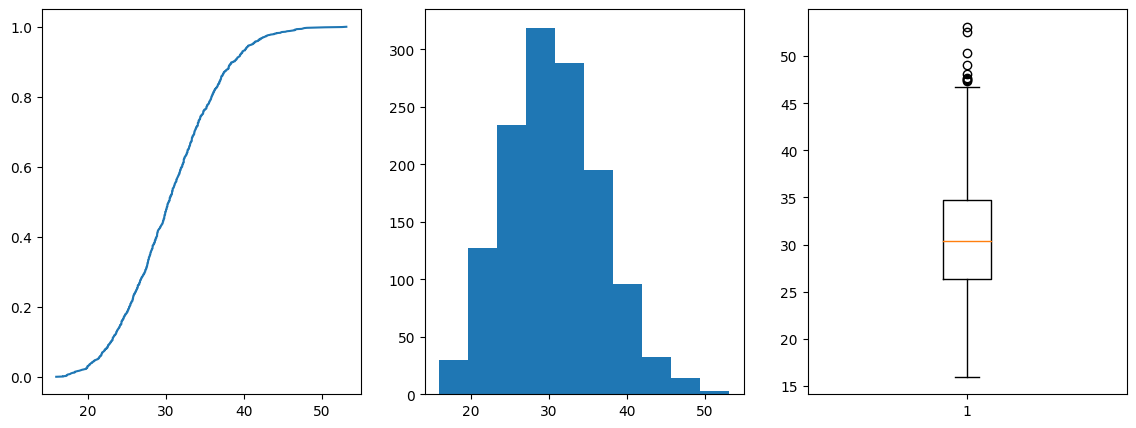

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
fig.tight_layout()
emp_cdf = axs[0]
hist = axs[1]
box = axs[2]
# empirical cdf plot
bmi = df["bmi"].to_numpy()
bmi.sort()
emp_cdf.plot(bmi, np.arange(len(bmi)) / float(len(bmi)))
# histogram
hist.hist(bmi)
# box-plot
box.boxplot(bmi)



### Plots (for each combination)

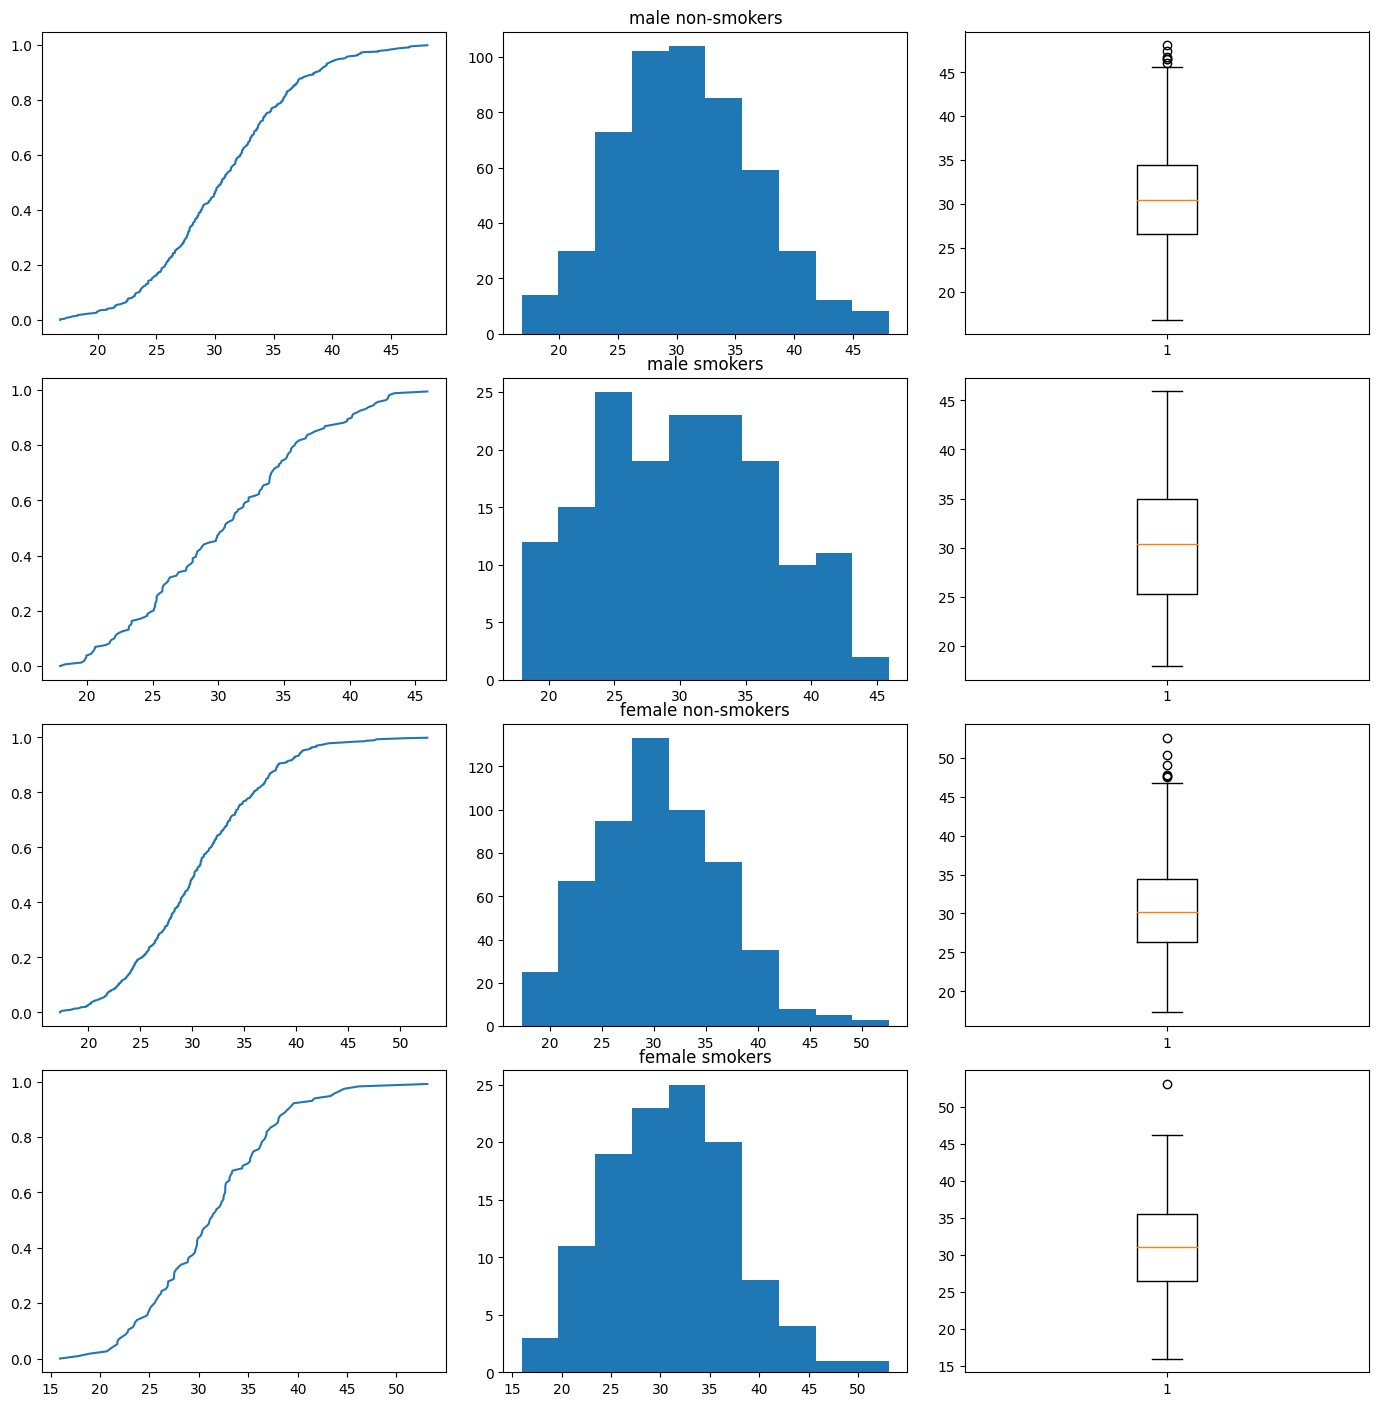

In [53]:
def plot(axs, d, name):
    emp_cdf = axs[0]
    hist = axs[1]
    hist.set_title(name)
    box = axs[2]
    # empirical cdf plot
    bmi = d["bmi"].to_numpy()
    bmi.sort()
    emp_cdf.plot(bmi, np.arange(len(bmi)) / float(len(bmi)))
    # histogram
    hist.hist(bmi)
    # box-plot
    box.boxplot(bmi)

fig, axs = plt.subplots(4, 3, figsize=(14, 14))
fig.tight_layout()
i = 0
for sex in ["male", "female"]:
    for smoker in ["no", "yes"]:
        plot(axs[i], df.query(f"sex == \"{sex}\" & smoker == \"{smoker}\""), f"""{sex} {"smoker" if smoker == "yes" else "non-smoker"}s""")
        i += 1